# Notebook to plot fig01

## 0 import module

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as colors
import math

## 1 parameters

In [2]:
# data dir path
cdir='./'

# list of file variables to process and the corresponding infile variables
fvarlst=['tprecip','tas','uas']
cvarlst=['tprecip','tas','uas']
sflst  =[86400.0*365.0, 1.0, 1.0]
cunitlst=['mm/y','K','m/s']

# plot title prefix
ctitle_pre=['(a) ', '(b) ','(c) ','(d) ','(e) ','(f) ']

# reference period
yrefs=1975; yrefe=2014

# trg period
ytrgs=2260; ytrge=2299

cfext = '{:d}{:d}-{:d}{:d}'.format(ytrgs,ytrge,yrefs,yrefe)

# colorbar
cmap='RdBu_r'
vminlst=[-1e-10,-1e-10,-1.]
vmaxlst=[ 1000,20.,3.]

## 2 Compute curl anomaly

## 2.1 load data

In [3]:
# load data
fvar='uas'
print('    load anomaly data ...')
cfile_pert='CLIMATO_FORCING/JRA55_ano_{}_monthly_{}_y1951.nc'.format(cfext,fvar)
cfile_ref='CLIMATO_FORCING/JRA55_monthly_{}_y1951.nc'.format(fvar)
print('        file : {}'.format(cfile_pert))
dspert_month = xr.open_dataset(cfile_pert).sel(lat=slice(-90,-50))
print('        file : {}'.format(cfile_ref))
dsref_month = xr.open_dataset(cfile_ref).sel(lat=slice(-90,-50))

# Annual mean
# compute anomaly
dspertu_annual=dspert_month.mean(dim='time')
dsrefu_annual=dsref_month.mean(dim='time')
dsanou_annual=dspertu_annual-dsrefu_annual

fvar='vas'
print('    load anomaly data ...')
cfile_pert='CLIMATO_FORCING/JRA55_ano_{}_monthly_{}_y1951.nc'.format(cfext,fvar)
cfile_ref='CLIMATO_FORCING/JRA55_monthly_{}_y1951.nc'.format(fvar)
print('        file : {}'.format(cfile_pert))
dspert_month = xr.open_dataset(cfile_pert).sel(lat=slice(-90,-50))
print('        file : {}'.format(cfile_ref))
dsref_month = xr.open_dataset(cfile_ref).sel(lat=slice(-90,-50))

# Annual mean
# compute anomaly
dspertv_annual=dspert_month.mean(dim='time')
dsrefv_annual=dsref_month.mean(dim='time')
dsanov_annual=dspertv_annual-dsrefv_annual

r=6371000.
lont=dsanou_annual['lon'].values
latt=dsanou_annual['lat'].values
lonf=lont+0.5625/2.
latf=latt+0.5625/2.
lont2d,latt2d=np.meshgrid(lont,latt)
lonf2d,latf2d=np.meshgrid(lonf,latf)
e1t=r*np.diff(lont2d*np.pi/180.,axis=1)*np.cos(latt2d[:,0:-1]*np.pi/180.)
e2t=r*np.diff(latt2d*np.pi/180.,axis=0)
e1f=r*np.diff(lonf2d*np.pi/180.,axis=1)*np.cos(latf2d[:,0:-1]*np.pi/180.)
e2f=r*np.diff(latf2d*np.pi/180.,axis=0)

    load anomaly data ...
        file : CLIMATO_FORCING/JRA55_ano_22602299-19752014_monthly_uas_y1951.nc
        file : CLIMATO_FORCING/JRA55_monthly_uas_y1951.nc
    load anomaly data ...
        file : CLIMATO_FORCING/JRA55_ano_22602299-19752014_monthly_vas_y1951.nc
        file : CLIMATO_FORCING/JRA55_monthly_vas_y1951.nc


### 2.2 Compute curl

In [4]:
v=dsanov_annual['vas'].values.squeeze()
u=dsanou_annual['uas'].values.squeeze()
curl_ano=np.diff(v,axis=1)[0:-1,:]/e1t[0:-1,:]-np.diff(u,axis=0)[:,0:-1]/e2t[:,0:-1]

v=dspertv_annual['vas'].values.squeeze()
u=dspertu_annual['uas'].values.squeeze()
curl_pert=np.diff(v,axis=1)[0:-1,:]/e1t[0:-1,:]-np.diff(u,axis=0)[:,0:-1]/e2t[:,0:-1]

## plot

    load anomaly data ...
        file : CLIMATO_FORCING/JRA55_ano_22602299-19752014_monthly_tprecip_y1951.nc
        file : CLIMATO_FORCING/JRA55_monthly_tprecip_y1951.nc


/var/folders/fj/r0q0fhhx4450585wlhdlw_s80000gn/T/ipykernel_19673/2601035364.py:107: UserWarning: No contour levels were found within the data range.
  ax.contour(var_ref['time'],var_ref['lat'],var_ref[cvar].transpose(),levels=[-99999,0,9999999],colors='cornflowerblue',linewidths=2)
/var/folders/fj/r0q0fhhx4450585wlhdlw_s80000gn/T/ipykernel_19673/2601035364.py:108: UserWarning: No contour levels were found within the data range.
  ax.contour(var_ref['time'],var_ref['lat'],var_pert[cvar].transpose(),levels=[-99999,0,9999999],colors='sienna',linewidths=2)


    load anomaly data ...
        file : CLIMATO_FORCING/JRA55_ano_22602299-19752014_monthly_tas_y1951.nc
        file : CLIMATO_FORCING/JRA55_monthly_tas_y1951.nc


/var/folders/fj/r0q0fhhx4450585wlhdlw_s80000gn/T/ipykernel_19673/2601035364.py:107: UserWarning: No contour levels were found within the data range.
  ax.contour(var_ref['time'],var_ref['lat'],var_ref[cvar].transpose(),levels=[-99999,0,9999999],colors='cornflowerblue',linewidths=2)
/var/folders/fj/r0q0fhhx4450585wlhdlw_s80000gn/T/ipykernel_19673/2601035364.py:108: UserWarning: No contour levels were found within the data range.
  ax.contour(var_ref['time'],var_ref['lat'],var_pert[cvar].transpose(),levels=[-99999,0,9999999],colors='sienna',linewidths=2)


    load anomaly data ...
        file : CLIMATO_FORCING/JRA55_ano_22602299-19752014_monthly_uas_y1951.nc
        file : CLIMATO_FORCING/JRA55_monthly_uas_y1951.nc
    load data ...
        file : CLIMATO_FORCING/JRA55_ano_22602299-19752014_monthly_uas_y1951.nc
        file : CLIMATO_FORCING/JRA55_monthly_uas_y1951.nc
        file : CLIMATO_FORCING/JRA55_ano_22602299-19752014_monthly_vas_y1951.nc
        file : CLIMATO_FORCING/JRA55_monthly_vas_y1951.nc


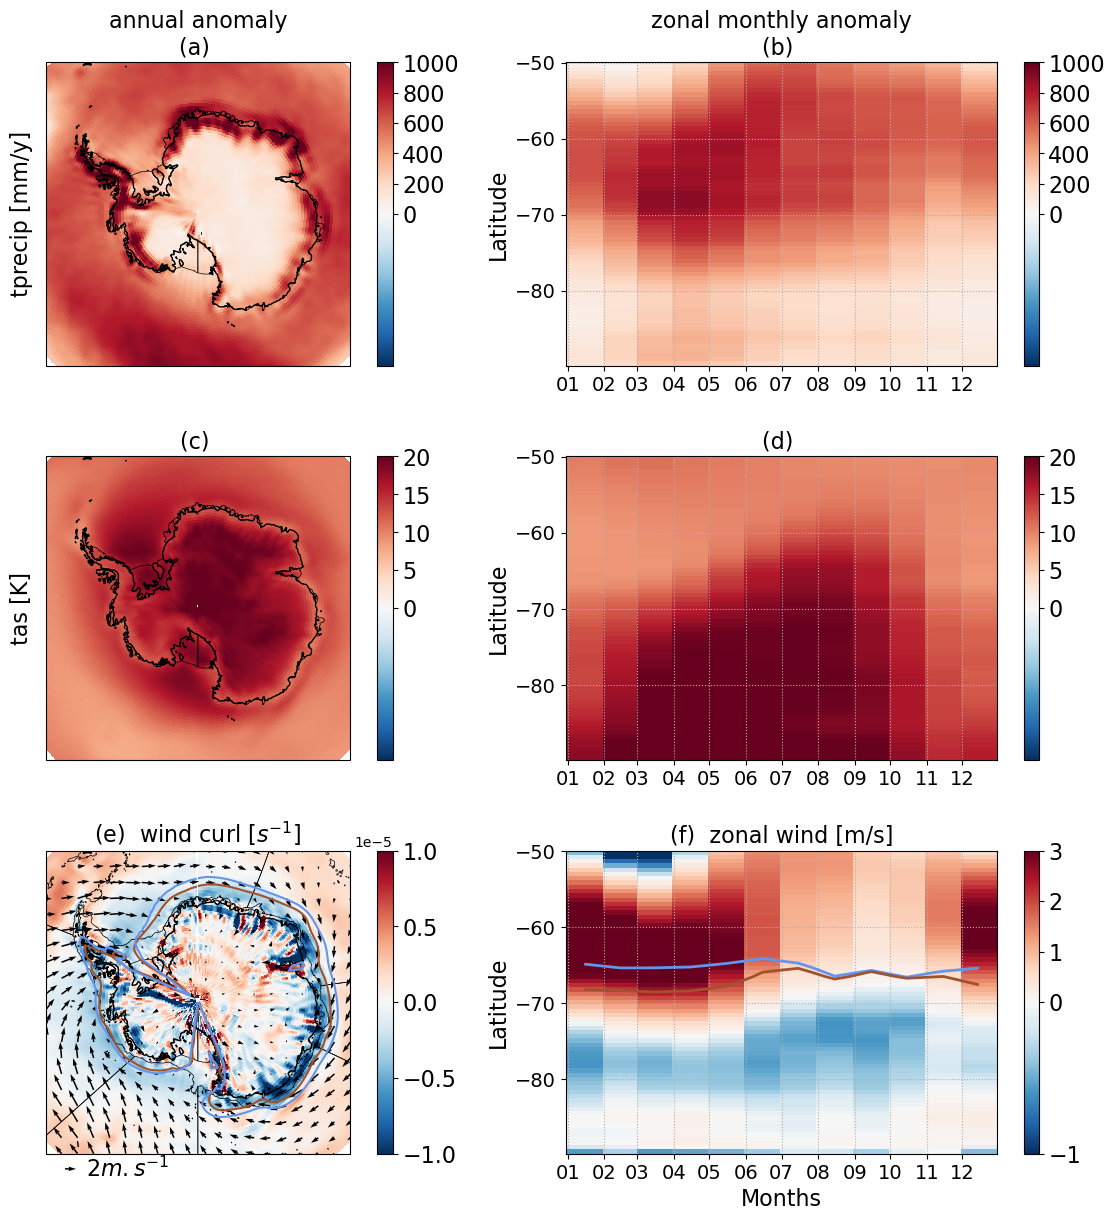

In [5]:
# define figure
fig=plt.figure(figsize=(np.array([600,120*3]) / 25.4))
grid = plt.GridSpec(len(fvarlst), 3, wspace=0.2, hspace=0.3)

# process all data
for ivar, fvar in enumerate(fvarlst):
    cvar=cvarlst[ivar]
    
    # load data
    print('    load anomaly data ...')
    cfile_pert='CLIMATO_FORCING/JRA55_ano_{}_monthly_{}_y1951.nc'.format(cfext,fvar)
    cfile_ref='CLIMATO_FORCING/JRA55_monthly_{}_y1951.nc'.format(fvar)
    print('        file : {}'.format(cfile_pert))
    dspert_month = xr.open_dataset(cfile_pert).sel(lat=slice(-90,-50))
    print('        file : {}'.format(cfile_ref))
    dsref_month = xr.open_dataset(cfile_ref).sel(lat=slice(-90,-50))

    # Annual mean
    # compute anomaly
    dspert_annual=dspert_month.mean(dim='time')
    dsref_annual=dsref_month.mean(dim='time')
    dsano_annual=dspert_annual-dsref_annual
    
    if cvar == 'uas':
        print('    load data ...')
        cfileu_pert='CLIMATO_FORCING/JRA55_ano_{}_monthly_{}_y1951.nc'.format(cfext,'uas')
        cfileu_ref='CLIMATO_FORCING/JRA55_monthly_{}_y1951.nc'.format('uas')
        cfilev_pert='CLIMATO_FORCING/JRA55_ano_{}_monthly_{}_y1951.nc'.format(cfext,'vas')
        cfilev_ref='CLIMATO_FORCING/JRA55_monthly_{}_y1951.nc'.format('vas')
        print('        file : {}'.format(cfileu_pert))
        dspertu_month = xr.open_dataset(cfileu_pert).sel(lat=slice(-90,-50))
        print('        file : {}'.format(cfileu_ref))
        dsrefu_month = xr.open_dataset(cfileu_ref).sel(lat=slice(-90,-50))
        print('        file : {}'.format(cfilev_pert))
        dspertv_month = xr.open_dataset(cfilev_pert).sel(lat=slice(-90,-50))
        print('        file : {}'.format(cfilev_ref))
        dsrefv_month = xr.open_dataset(cfilev_ref).sel(lat=slice(-90,-50))

            # # Annual mean
        # compute anomaly
        dspertu_annual=dspertu_month.mean(dim='time')
        dsrefu_annual=dsrefu_month.mean(dim='time')
        dsanou_annual=dspertu_annual-dsrefu_annual
        # compute anomaly
        dspertv_annual=dspertv_month.mean(dim='time')
        dsrefv_annual=dsrefv_month.mean(dim='time')
        dsanov_annual=dspertv_annual-dsrefv_annual

    # monthly mean
    # compute anomaly
    var_pert=dspert_month.mean(dim='lon')
    var_ref=dsref_month.mean(dim='lon')
    var_ano=var_pert-var_ref

        # norm plot
    norm=colors.TwoSlopeNorm(vmin=vminlst[ivar],vmax=vmaxlst[ivar],vcenter=-0.0)
    
    # plot annual mean
    ax = fig.add_subplot(grid[ivar,0], projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0))
    if cvar != 'uas':
        ax.annotate(fvar+' ['+cunitlst[ivar]+']', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords='axes fraction', textcoords='offset points',
                ha='right', va='center', fontsize=16, rotation=90)
    if ivar==0 :
        ax.annotate('annual anomaly', xy=(0.5, 1), xytext=(0, 25),
            xycoords='axes fraction', textcoords='offset points',
            ha='center', va='baseline', fontsize=16)
        
    if cvar != 'uas':
        pcol=ax.pcolormesh(dspert_annual['lon'],dspert_annual['lat'],dsano_annual[cvar] * sflst[ivar],cmap=cmap,norm=norm,transform=ccrs.PlateCarree())
        feature=cartopy.feature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '50m', facecolor='none')
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.add_feature(feature,linewidth=0.5,edgecolor='k')
        ax.coastlines()
        XY_lim=[(-180, 180, -90, -60),ccrs.PlateCarree()]
        ax.set_extent(XY_lim[0], XY_lim[1])
        ax.set_title(ctitle_pre[ivar*2],fontsize=16)
        cbar=plt.colorbar(pcol)
        cbar.ax.tick_params(labelsize=16)
    else:
        feature=cartopy.feature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '50m', facecolor='none')
        ax.add_feature(feature,linewidth=0.5,edgecolor='k')
        feature=cartopy.feature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical', facecolor='none')
        ax.add_feature(feature,linewidth=0.5,edgecolor='k')
        ax.coastlines()
        XY_lim=[(-180, 180, -90, -60),ccrs.PlateCarree()]
        ax.set_extent(XY_lim[0], XY_lim[1])
        M=np.hypot(dsanou_annual['uas'].values,dsanov_annual['vas'].values)
        pcol=ax.pcolormesh(dspert_annual['lon'],dspert_annual['lat'],curl_ano,cmap='RdBu_r',vmin=-1e-5,vmax=1e-5,transform=ccrs.PlateCarree())
        #qv = ax.quiver(dspert_annual['lon'].values,dspert_annual['lat'].values,dsanou_annual['uas'].values,dsanov_annual['vas'].values,transform=ccrs.PlateCarree(), regrid_shape=20, width=0.005)
        qv = ax.quiver(dspert_annual['lon'].values,dspert_annual['lat'].values,dsanou_annual['uas'].values,dsanov_annual['vas'].values,transform=ccrs.PlateCarree(), regrid_shape=20, width=0.005)
        qk = ax.quiverkey(qv, 0.1, -0.05, 2, r'2$m.s^{-1}}$', labelpos='E',fontproperties={'size':16})
        ax.contour(dspert_annual['lon'].values,dspert_annual['lat'].values,dspertu_annual['uas'].values,levels=[-99999,0,9999999],colors='sienna',transform=ccrs.PlateCarree())
        ax.contour(dspert_annual['lon'].values,dspert_annual['lat'].values,dsrefu_annual['uas'].values,levels=[-99999,0,9999999],colors='cornflowerblue',transform=ccrs.PlateCarree())
        #cbar=plt.colorbar(qv)
        cbar2=plt.colorbar(pcol)
        #cbar.ax.tick_params(labelsize=16)
        cbar2.ax.tick_params(labelsize=16)
        ax.set_title(ctitle_pre[ivar*2]+' wind curl [$s^{-1}$]',fontsize=16)

    # plot monthly mean
    vmin=np.min(var_ano[cvar].values)
    vmax=np.max(var_ano[cvar].values)
    
    ax = fig.add_subplot(grid[ivar,1])
    pcol=ax.pcolormesh(var_ref['time'],var_ref['lat'],var_ano[cvar].transpose()*sflst[ivar],cmap=cmap,norm=norm,)
    ax.contour(var_ref['time'],var_ref['lat'],var_ref[cvar].transpose(),levels=[-99999,0,9999999],colors='cornflowerblue',linewidths=2)
    ax.contour(var_ref['time'],var_ref['lat'],var_pert[cvar].transpose(),levels=[-99999,0,9999999],colors='sienna',linewidths=2)
    date_form = DateFormatter("%m")
    if ivar==0:
        ax.annotate('zonal monthly anomaly', xy=(0.5, 1), xytext=(0, 25),
            xycoords='axes fraction', textcoords='offset points',
            ha='center', va='baseline', fontsize=16)
    ax.set_title(ctitle_pre[ivar*2+1],fontsize=16)
    if cvar == 'uas':
        ax.set_title(ctitle_pre[ivar*2+1]+' zonal wind [m/s]',fontsize=16)
    ax.xaxis.set_major_formatter(date_form)
    if ivar==2:
        ax.set_xlabel('Months',fontsize=16)
    ax.set_ylabel('Latitude',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(linestyle=':')
    cbar=plt.colorbar(pcol)
    cbar.ax.tick_params(labelsize=16)
    
plt.savefig('figure1.png', format='png', dpi=150)